In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

bank_info = pd.read_csv("./data/bank-full-cleaned.csv",sep=';')
#bank_no_duration = pd.read_csv("./data/bank-no-duration.csv",sep=';')
#bank_info_ori = pd.read_csv("./data/bank-full.csv",sep=';')

### Reference Table
job:
- blue-collar: 1
- management: 4
- technician: 9
- admin.: 0
- services: 7
- retired: 5
- self-employed: 6
- entrepreneur: 2
- unemployed: 10
- housemaid: 3
- student: 8
- unknown: 11

marital:
- married: 1
- single: 2
- divorced: 0

education:
- secondary: 1
- tertiary: 2
- primary: 0
- unknown: 3

contact:
- cellular: 0
- unknown: 2
- telephone: 1

poutcome:
- unknown: 3
- failure: 0
- other: 1
- success: 2

### Attributs Analysis

In [3]:
bank_info.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


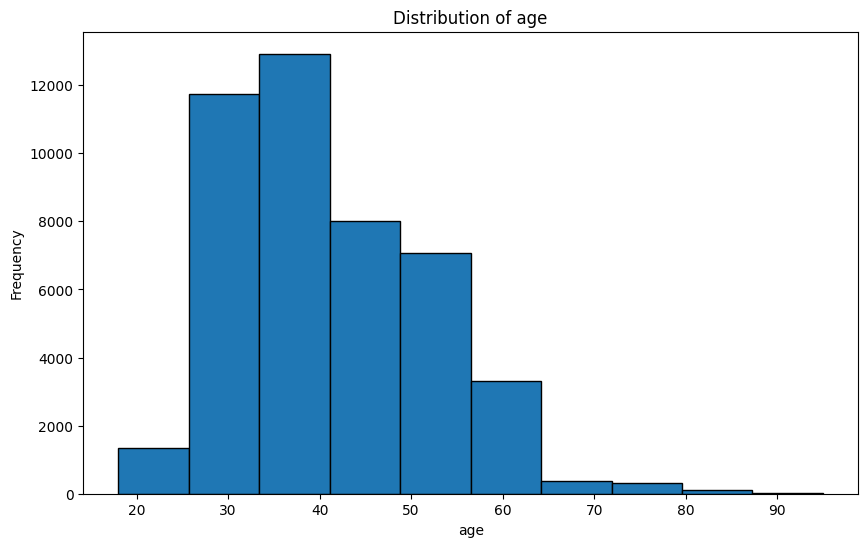

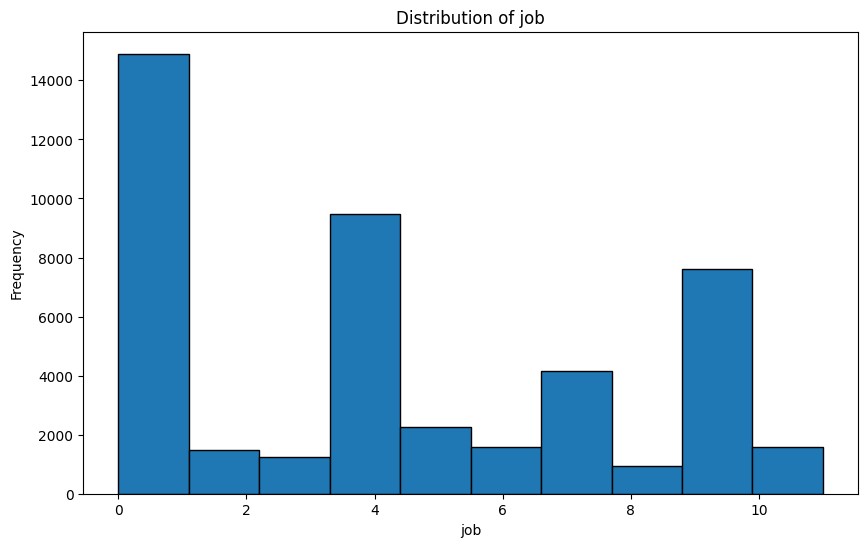

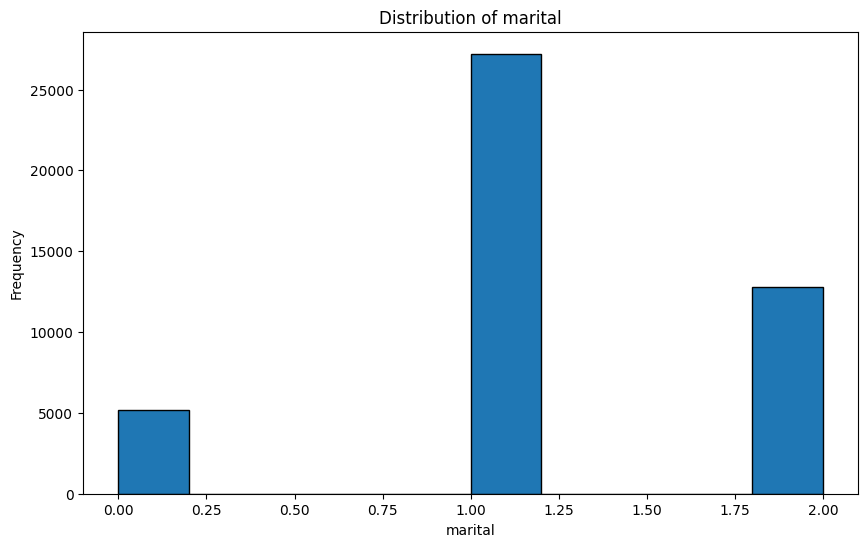

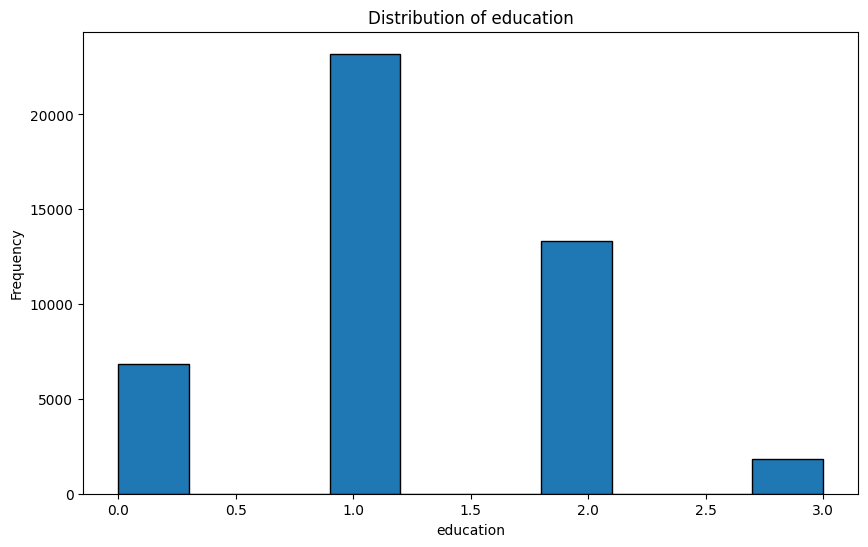

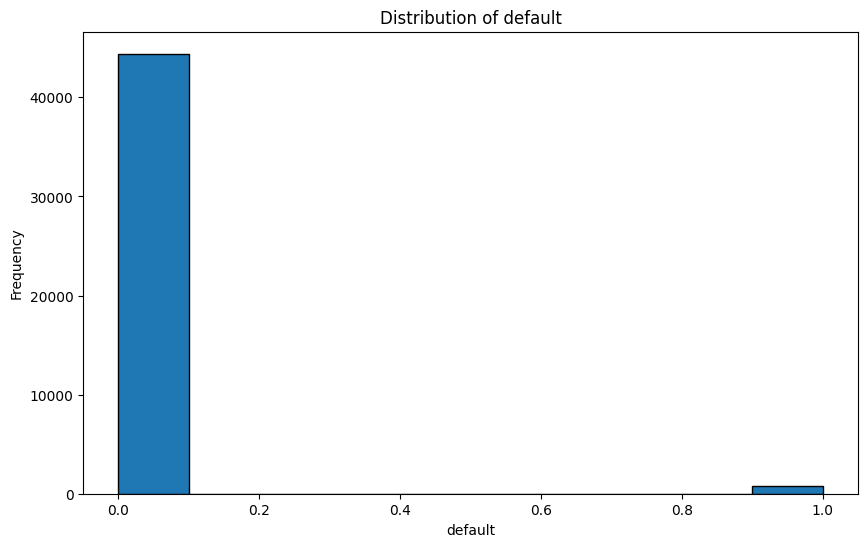

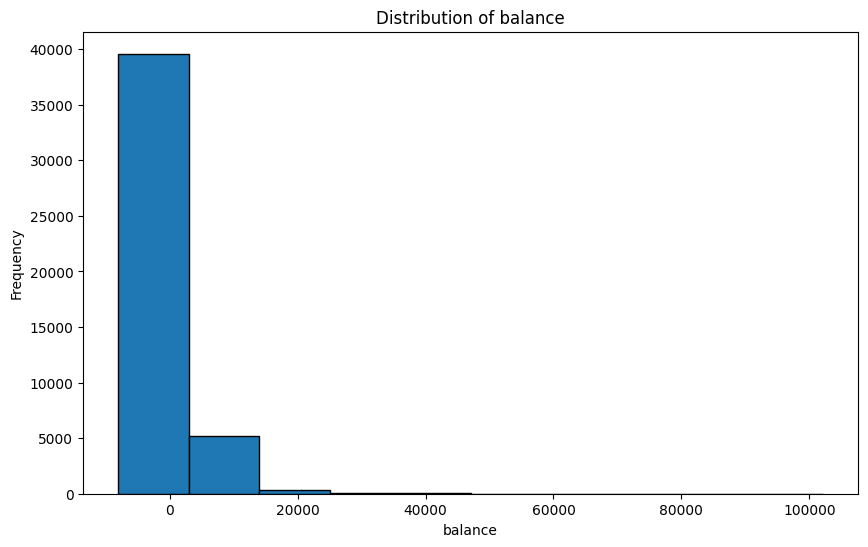

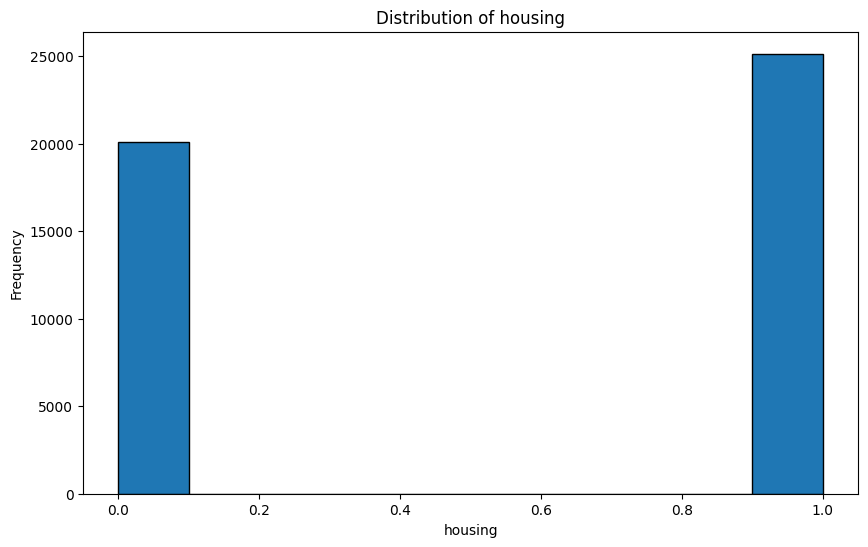

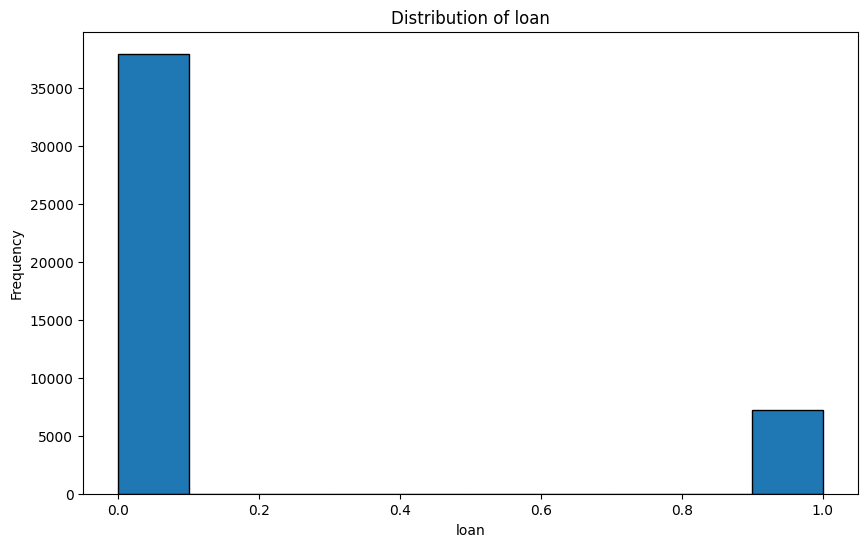

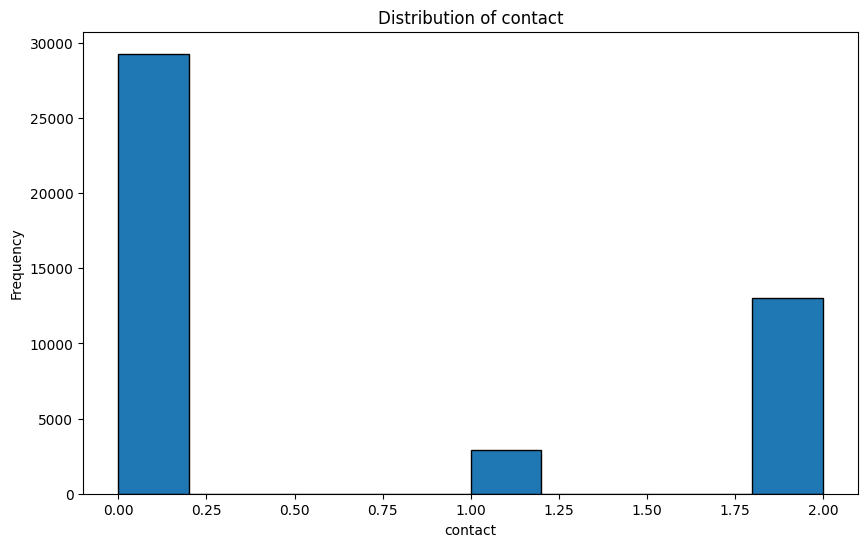

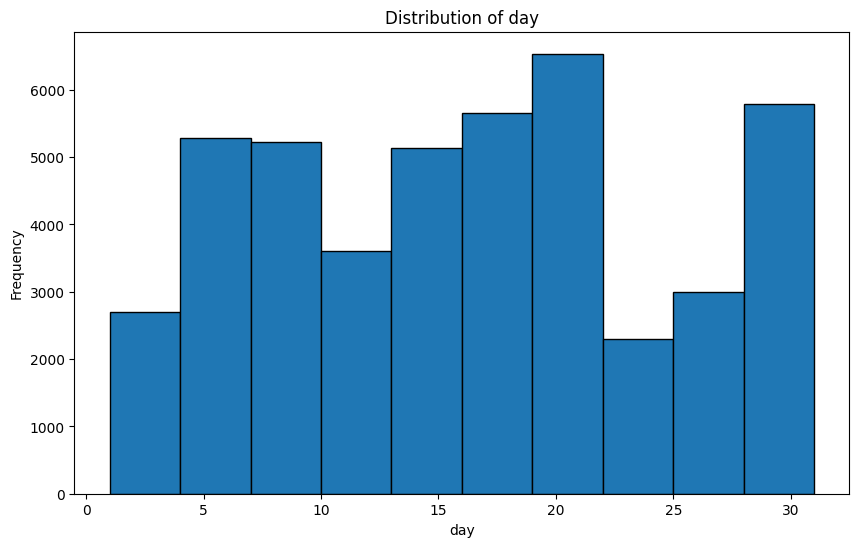

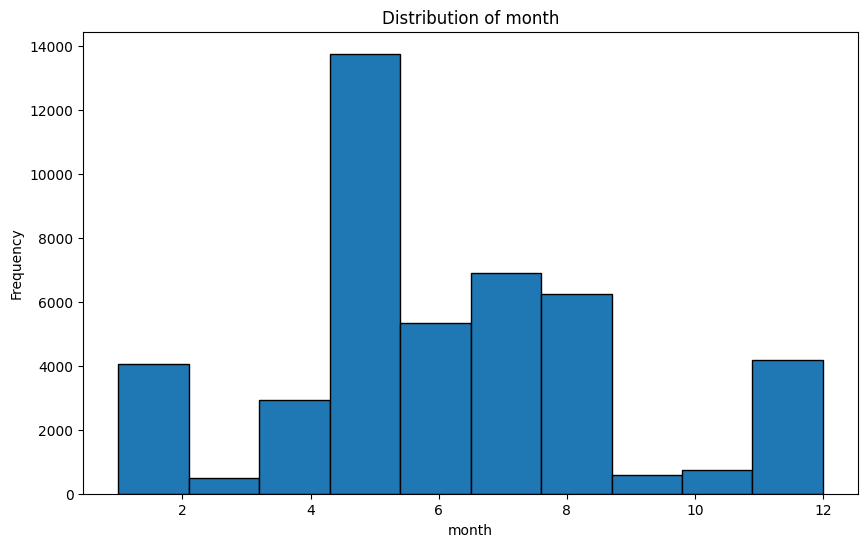

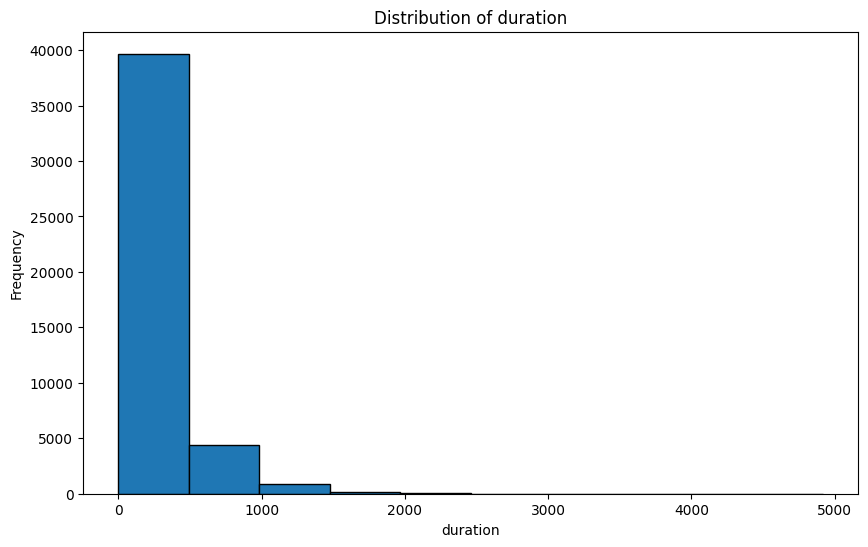

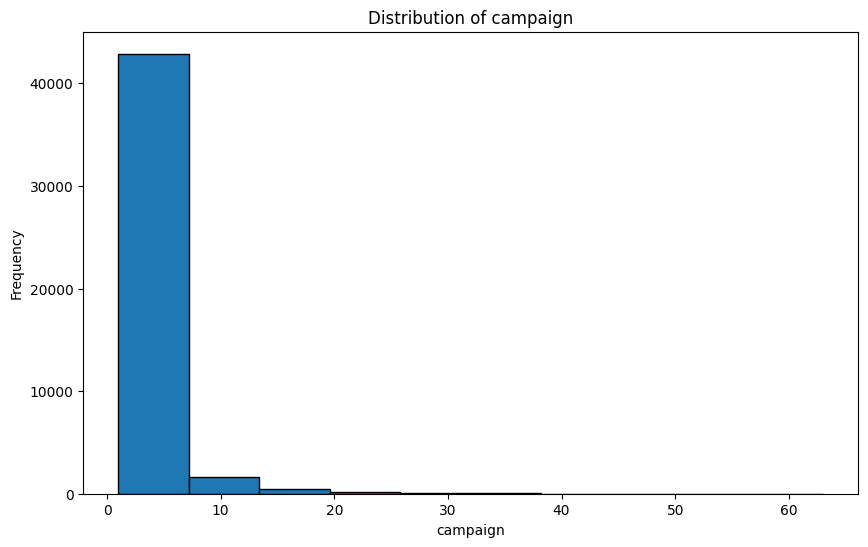

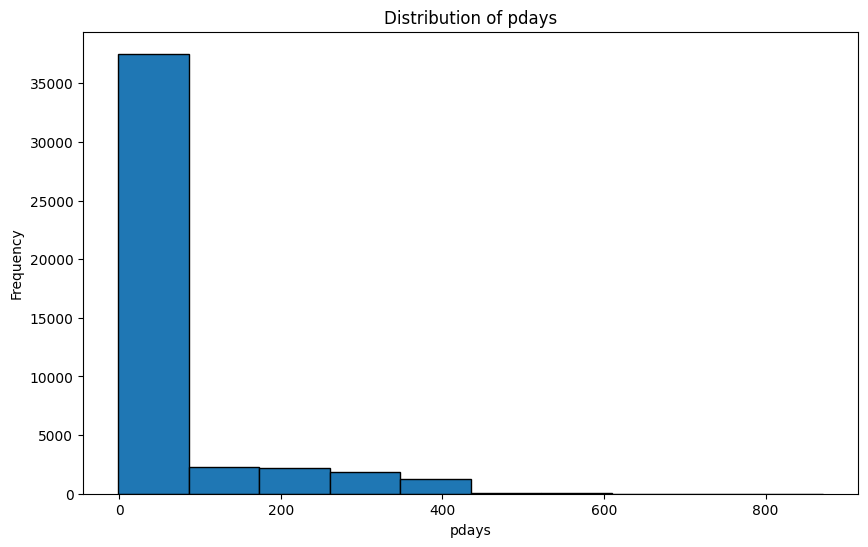

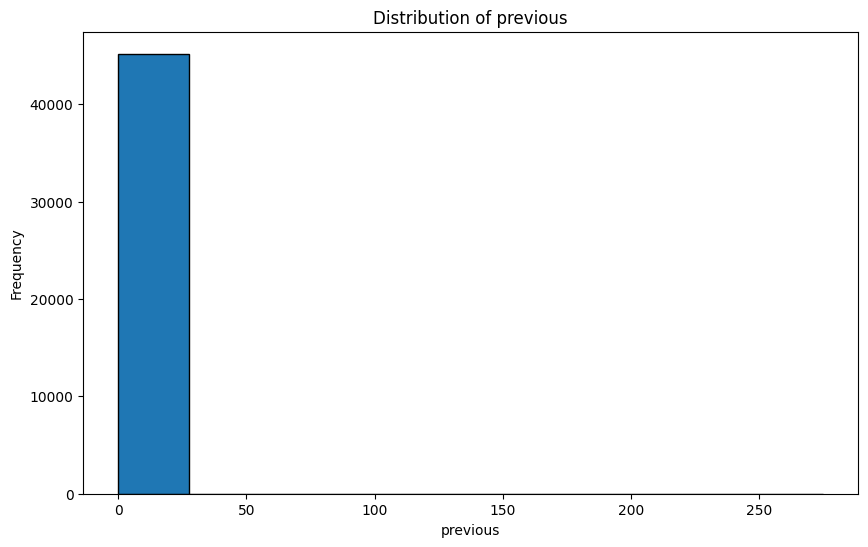

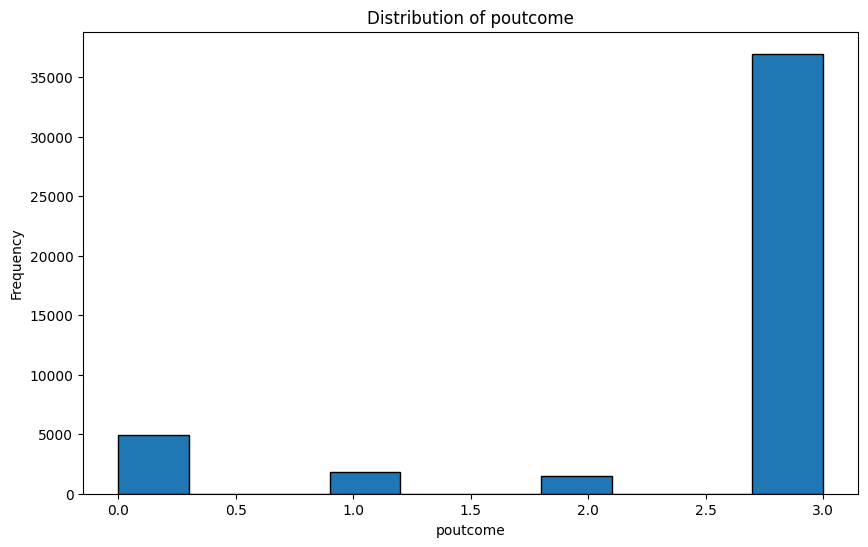

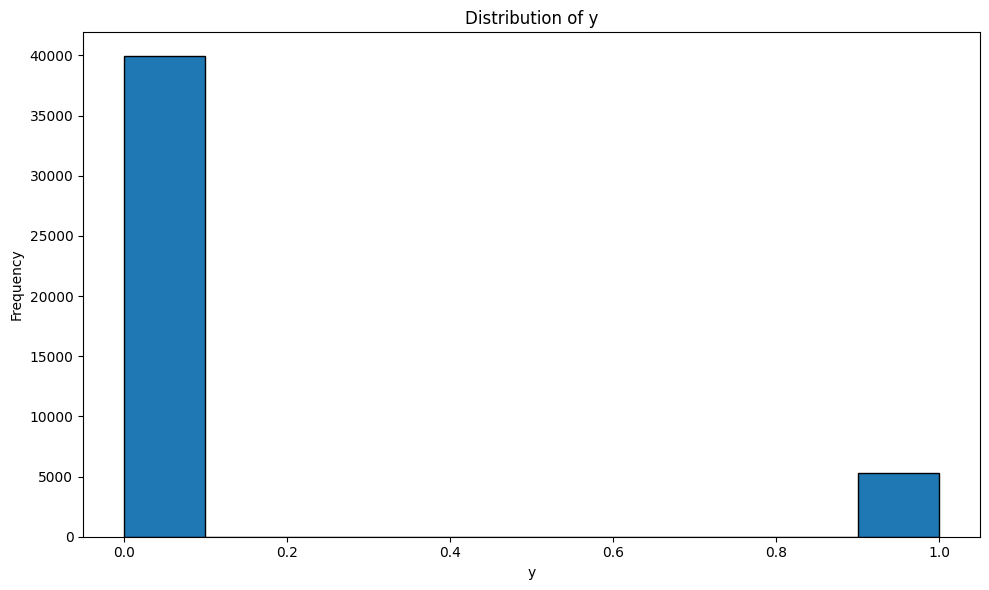

In [17]:
for col in bank_info.columns:
    plt.figure()
    bank_info[col].plot(kind='hist',
                        title=f'Distribution of {col}',
                        edgecolor='k',
                        figsize=(10, 6))
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Question
Who has the most bank balance, who are the most potential customers? 

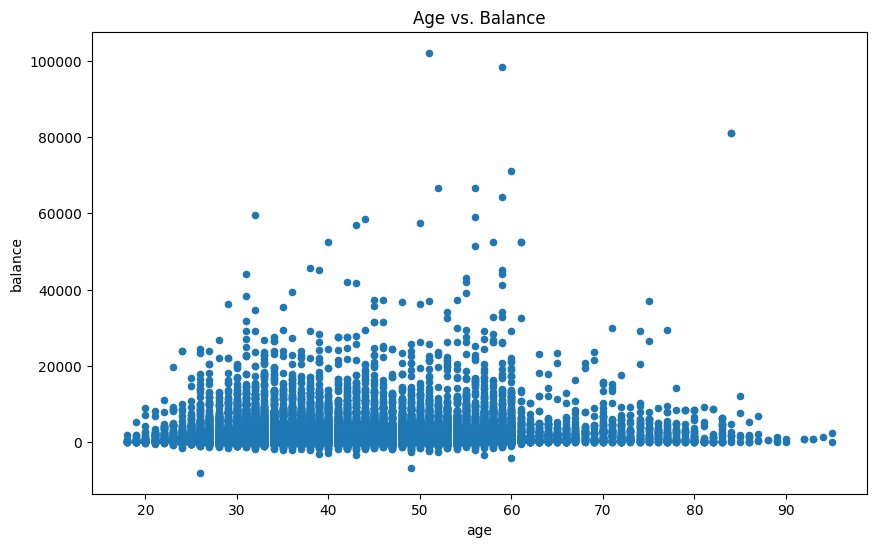

In [18]:
# correlation between age and balance
bank_info.plot(kind="scatter",
               x="age",
               y="balance",
               figsize=(10, 6),
               title="Age vs. Balance")
plt.show()

### Question
Will last campaign affect current campaign?

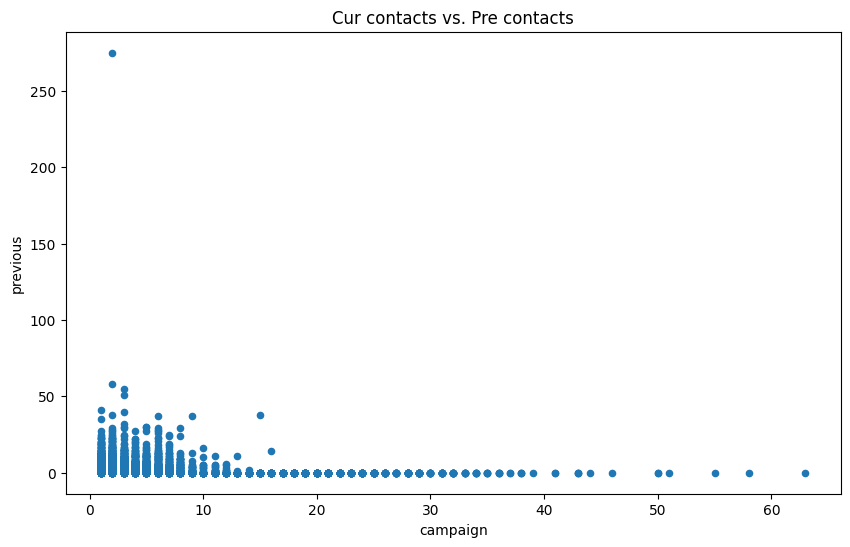

In [30]:
# correlation bewteen number of contacts performed during this campaign and number of contacts performed before this campaign
bank_info.plot(kind="scatter",
               x="campaign",
               y="previous",
               figsize=(10, 6),
               title="Cur contacts vs. Pre contacts")
plt.show()

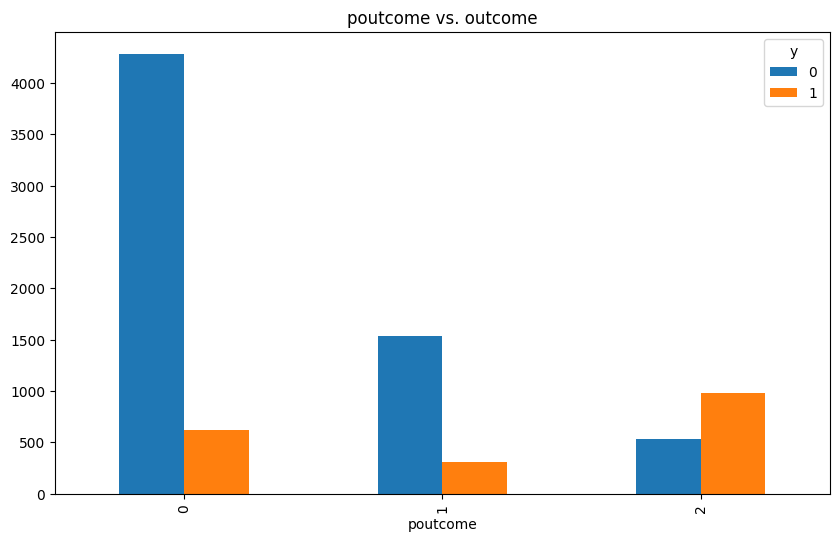

In [31]:
bank_info.query('poutcome != 3')\
    .groupby(['poutcome', 'y']) \
    .size().unstack(fill_value=0) \
    .plot(kind='bar', stacked=False, figsize=(10, 6), title='poutcome vs. outcome')
plt.xlabel('poutcome')
plt.show()

### Question
What attributes may affect the outcome?

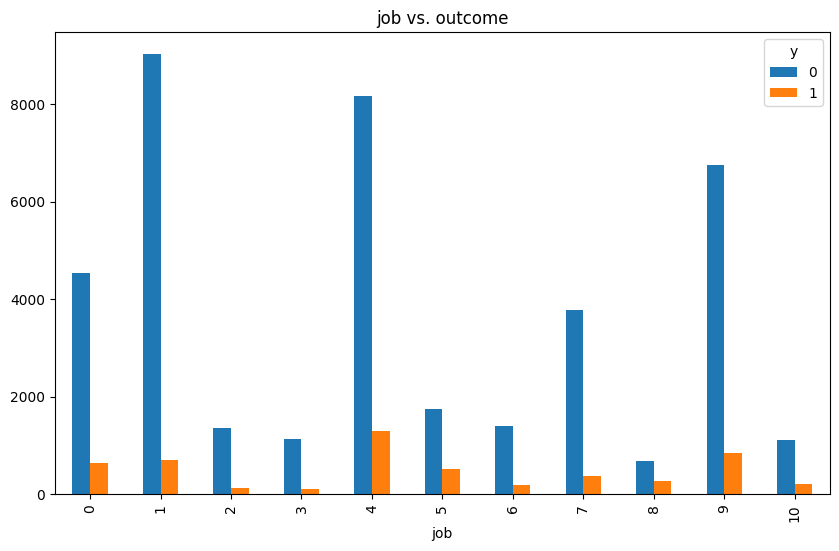

In [16]:
bank_info.query('job != 11')\
    .groupby(['job', 'y']) \
    .size().unstack(fill_value=0) \
    .plot(kind='bar', stacked=False, figsize=(10, 6), title='job vs. outcome')
plt.xlabel('job')
plt.show()

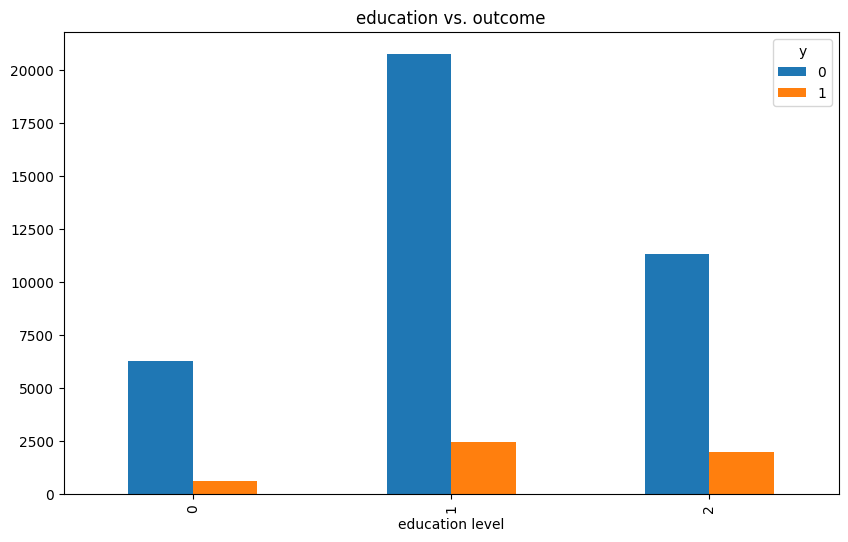

In [17]:
bank_info.query('education != 3')\
    .groupby(['education', 'y']) \
    .size().unstack(fill_value=0) \
    .plot(kind='bar', stacked=False, figsize=(10, 6), title='education vs. outcome')
plt.xlabel('education level')
plt.show()

### Question
Who owns more loan?

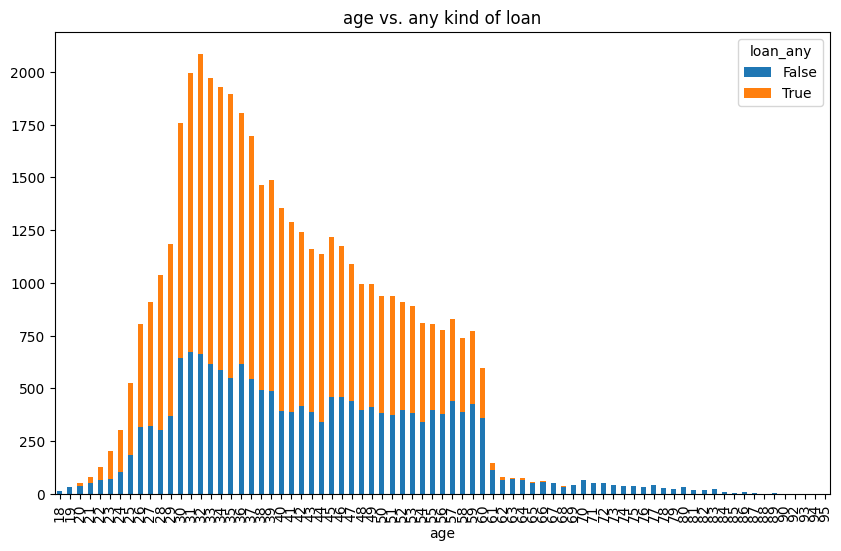

In [29]:
# correlation bewteen age and whether own loan
bank_info['loan_any'] = bank_info[['housing', 'loan']].any(axis=1)
grouped_data = bank_info.groupby(['age', 'loan_any']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar',
                  stacked=True,
                  figsize=(10, 6),
                  title='age vs. any kind of loan')
plt.show()

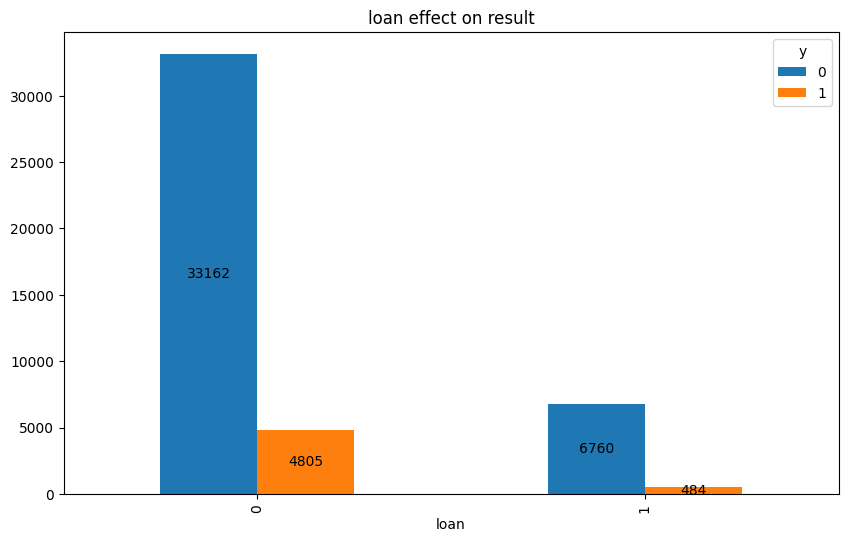

In [4]:
grouped_data = bank_info.groupby(['loan', 'y']).size().unstack(fill_value=0)
ax = grouped_data.plot(kind='bar',
                  stacked=False,
                  figsize=(10, 6),
                  title='loan effect on result')
for i in ax.containers:
    ax.bar_label(i,label_type='center', labels=i.datavalues, rotation=0)
plt.show()

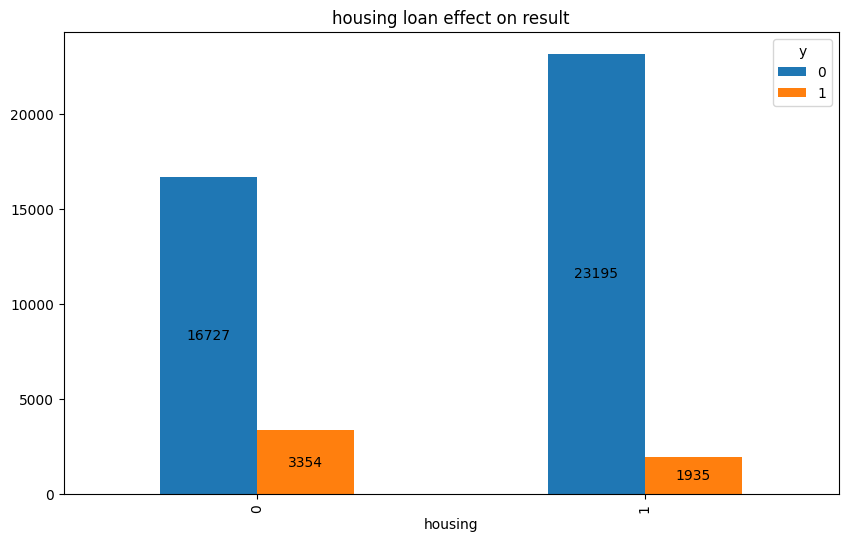

In [5]:
grouped_data = bank_info.groupby(['housing', 'y']).size().unstack(fill_value=0)
ax = grouped_data.plot(kind='bar',
                  stacked=False,
                  figsize=(10, 6),
                  title='housing loan effect on result')
for i in ax.containers:
    ax.bar_label(i,label_type='center', labels=i.datavalues, rotation=0)
plt.show()

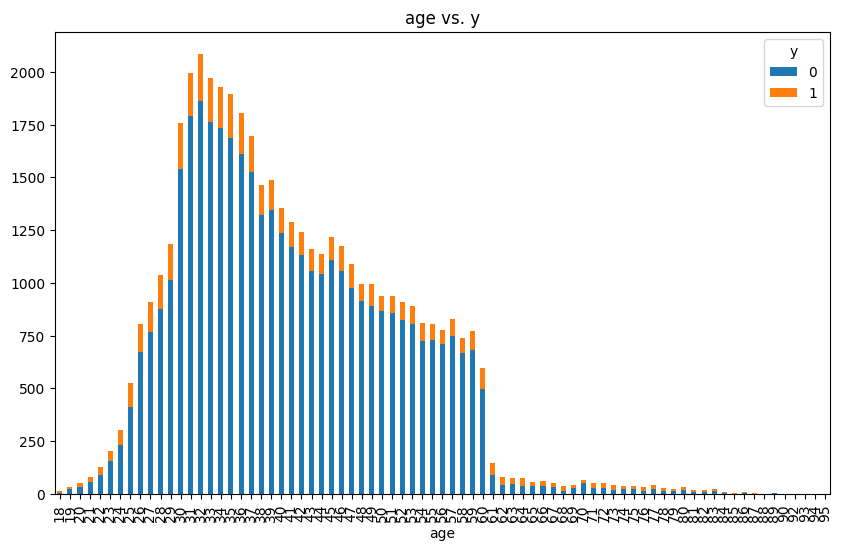

In [3]:
grouped_data = bank_info.groupby(['age', 'y']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar',
                  stacked=True,
                  figsize=(10, 6),
                  title='age vs. y')
plt.show()

### Question
Will longer contact duration lead to better outcome?

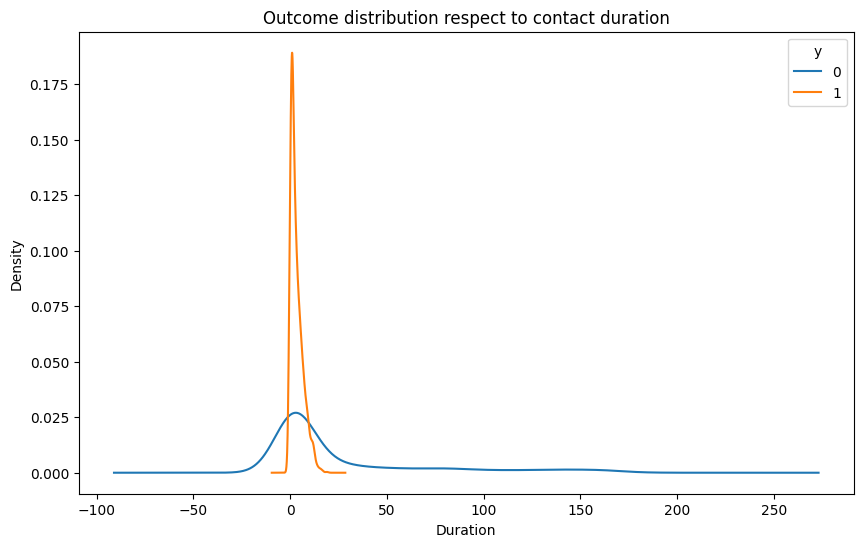

In [14]:
bank_info.query('duration > 10')\
    .groupby(['duration', 'y']) \
    .size().unstack(fill_value=0) \
    .plot(kind='kde', stacked=True, figsize=(10, 6), title='Outcome distribution respect to contact duration')
plt.xlabel('Duration')
plt.show()

### Recommendation
#### Observation
1. Customer at age between 30 to 60 has most balance, but also owns most loan.
2. The success outcome of previous campaign will be more likely lead to success outcome of current campaign
3. Customer with high education level will be more likely to subscribe.
4. Contact duration does not always have positive relationship with outcome.
5. Customer without loan are more likely to subscribe.

#### Results
1. Focus on customers who subscribed during previous campagin.
2. Focus on customers age between 30 - 40.
3. Contact duration not always lead to desired outcome. 
